In [14]:
# !matplotlib notebook
import matplotlib.pyplot as plt
from skimage import data
from skimage.exposure import histogram
import tifffile
import os
import sys
from skimage import data, feature, exposure, filters
import numpy as np

def scale_to(x,  dtype):
    r = np.max(x) - np.min(x)
    try:
        t_max = np.iinfo(np.dtype(dtype)).max
    except:
        t_max = np.finfo(np.dtype(dtype)).max
    
    # assert(math.isclose(0,r, abs_tol=np.finfo(float).eps) == False)
    x_s =  ((x - np.min(x)) / r) * t_max
    return x_s.astype(dtype)

def subtract(a, b, dtype='uint16'):
    try:
        t_min = np.iinfo(np.dtype(dtype)).min
        t_max = np.iinfo(np.dtype(dtype)).max
    except:
        t_min = np.finfo(np.dtype(dtype)).min
        t_max = np.finfo(np.dtype(dtype)).max        
    return np.clip(a.astype('int32') - b, t_min, t_max).astype(dtype)

def top_hat(image, radius=50, light_bg=False):
        from skimage.morphology import white_tophat, black_tophat, disk
        str_el = disk(radius) #you can also use 'ball' here to get a slightly smoother result at the cost of increased computing time
        if light_bg:
            return  scale_to(black_tophat(image, str_el), image.dtype)
        else:
            return  scale_to(white_tophat(image, str_el), image.dtype)

def thresholdV2(image, param=10):
    from skimage.filters import threshold_otsu
    dtype = image.dtype
    thresh = threshold_otsu(image)
    
    return image > thresh

def threshold(image, param=10):
    from skimage.filters import threshold_otsu
    dtype = image.dtype
    thresh = threshold_otsu(image)
    
    return thresh, subtract(image, thresh, image.dtype)

def dspeckle(image, param=10):
    from skimage.filters import median
    dtype = image.dtype
    return median(image)
    

def gaussian_filter(image, param=10):
    from skimage.filters import gaussian
    return scale_to(gaussian(image), image.dtype)


def plot_multi(images):
    fig, ax = plt.subplots(ncols=len(images), figsize=(20, 8))
    for i, image in enumerate(images.items()):
        ax[i].set_title(str(image[0]))
        ax[i].imshow(image[1], clim=[np.min(image[1]), np.max(image[1])], cmap='gray')
    plt.show()

def save_images(images, pre_fix="img"):
    os.makedirs(os.path.join(path,pre_fix), exist_ok=True)
    for key, img in images.items():
        p = os.path.join(path,pre_fix, f"{key}_image.tif")
        print()
        tifffile.imwrite(p, img)

In [15]:
path = "D:\\Data\\Sucharita\\sample"
file_name = "single_frame.tif"
file_path = os.path.join(path, file_name)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


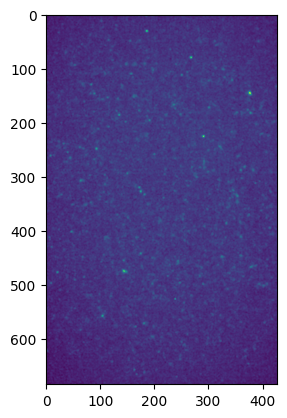

In [16]:
image = tifffile.imread(file_path)
plt.imshow(image)

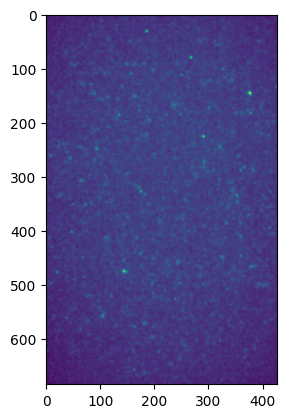

In [21]:
g_image = filters.gaussian(image)
plt.imshow(g_image)

0.006687554059730323
1.7160077528306025e-05


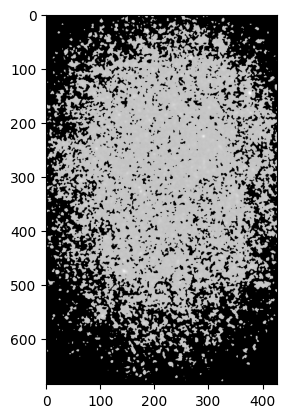

In [22]:
threshold_value = filters.threshold_otsu(g_image)
print(threshold_value)
g_image[g_image<=threshold_value] =0
# b_image = g_image > threshold_value
plt.imshow(g_image, cmap=plt.cm.gray)
threshold_value = filters.threshold_otsu(g_image)
print(threshold_value)

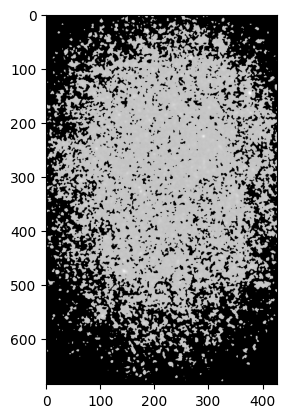

In [23]:
g_image[g_image<=threshold_value] =0
# b_image = g_image > threshold_value
plt.imshow(g_image, cmap=plt.cm.gray)